# imports 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo

# data 

In [74]:
x1 = np.random.randn(1000).tolist()
y1 = ['A']*1000
x2 = (np.random.randn(100)+5).tolist()
y2 = ['B']*100

In [75]:
df = pd.DataFrame({'x':x1+x2, 'y':y1+y2})
df

,x,y
0,-0.905509,A
1,0.844968,A
2,-0.374190,A
3,-1.311042,A
4,-1.657453,A
...,...,...
1095,4.890136,B
1096,6.158887,B
1097,4.367205,B
1098,4.704626,B


(array([ 3.,  0.,  1.,  3.,  7.,  9., 20., 26., 43., 39., 44., 46., 72.,
        76., 78., 69., 80., 89., 59., 49., 59., 48., 27., 22., 12.,  5.,
         8.,  3.,  2.,  1.,  1.,  4.,  1.,  4.,  3.,  8.,  9.,  7., 11.,
         6.,  6.,  6.,  8.,  8.,  6.,  4.,  5.,  2.,  0.,  1.]),
 array([-3.13891042, -2.93493634, -2.73096226, -2.52698818, -2.3230141 ,
        -2.11904002, -1.91506594, -1.71109186, -1.50711778, -1.3031437 ,
        -1.09916962, -0.89519554, -0.69122146, -0.48724738, -0.2832733 ,
        -0.07929922,  0.12467486,  0.32864894,  0.53262302,  0.7365971 ,
         0.94057118,  1.14454526,  1.34851934,  1.55249342,  1.7564675 ,
         1.96044158,  2.16441566,  2.36838974,  2.57236382,  2.7763379 ,
         2.98031198,  3.18428606,  3.38826014,  3.59223422,  3.7962083 ,
         4.00018238,  4.20415646,  4.40813053,  4.61210461,  4.81607869,
         5.02005277,  5.22402685,  5.42800093,  5.63197501,  5.83594909,
         6.03992317,  6.24389725,  6.44787133,  6.65184541,

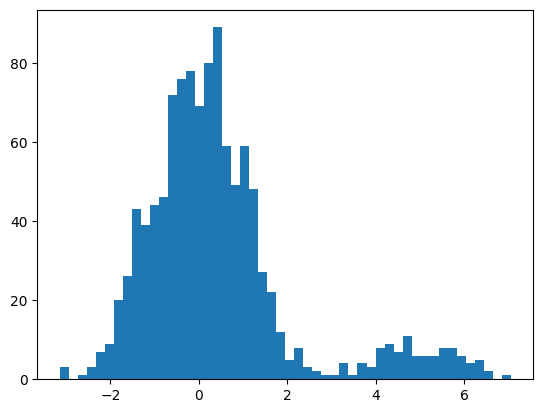

In [77]:
plt.hist(df.x,bins=50)

# CTGAN

In [93]:
# Names of the columns that are discrete
discrete_columns = ['y']
ctgan = CTGAN(epochs=500) # 겁나많이해야하네?
ctgan.fit(df, discrete_columns)

# Create synthetic data
df2 = ctgan.sample(1000)

/home/cgb2/anaconda3/envs/ctgan/lib/python3.10/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


In [94]:
df2.groupby('y').count()

,x
y,
A,364
B,636


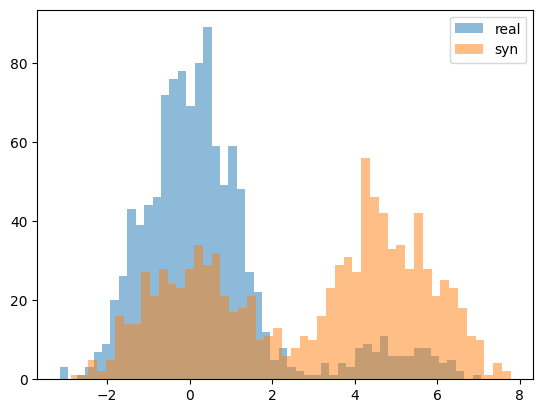

In [95]:
plt.hist(df.x,bins=50,alpha=0.5,label='real')
plt.hist(df2.x,bins=50,alpha=0.5,label='syn')
plt.legend()

array([[<Axes: title={'center': 'x'}>]], dtype=object)

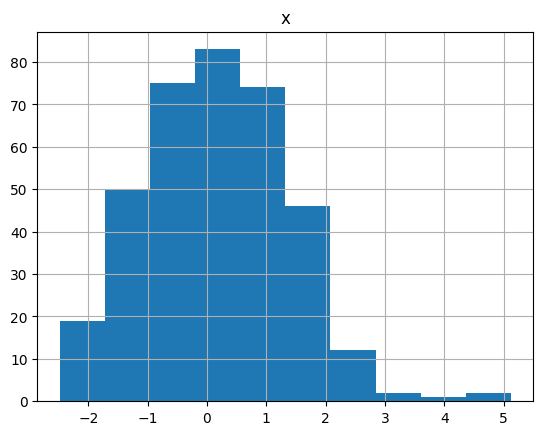

In [96]:
df2[df2.y=='A'].hist()

array([[<Axes: title={'center': 'x'}>]], dtype=object)

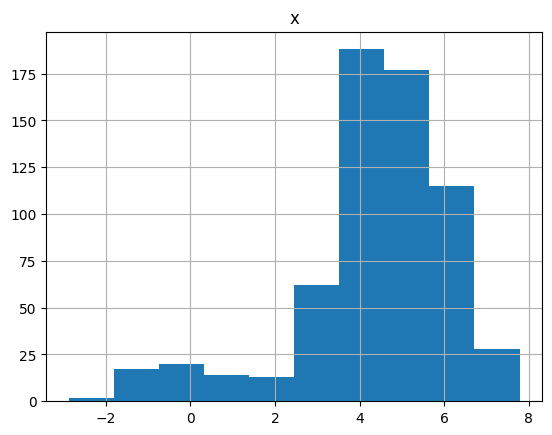

In [97]:
df2[df2.y=='B'].hist()